### Nika Mosayebi Behrooz (810196562)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import sign

In [2]:
data = pd.read_csv("AdmissionPredict.csv", delimiter= ',')
data

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1      337.0        118.0                  4  4.5   4.5  9.65   
1             2      324.0        107.0                  4  4.0   4.5  8.87   
2             3      316.0          NaN                  3  3.0   3.5  8.00   
3             4        NaN        110.0                  3  3.5   2.5  8.67   
4             5      314.0        103.0                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396      324.0        110.0                  3  3.5   3.5  9.04   
396         397      325.0        107.0                  3  3.0   3.5  9.11   
397         398      330.0        116.0                  4  5.0   4.5  9.45   
398         399      312.0        103.0                  3  3.5   4.0  8.78   
399         400      333.0        117.0                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
0           1             0.92  
1           1              NaN  
2           1             0.72  
3           1             0.80  
4           0             0.65  
..        ...              ...  
395         1             0.82  
396         1              NaN  
397         1             0.91  
398         0             0.67  
399         1             0.95  

[400 rows x 9 columns]

In [3]:
dTop = data.head()
dTop

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1      337.0        118.0                  4  4.5   4.5  9.65   
1           2      324.0        107.0                  4  4.0   4.5  8.87   
2           3      316.0          NaN                  3  3.0   3.5  8.00   
3           4        NaN        110.0                  3  3.5   2.5  8.67   
4           5      314.0        103.0                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1              NaN  
2         1             0.72  
3         1             0.80  
4         0             0.65

<p>We can print the first 5 rows of a dataframe using head method.</p><br>

In [4]:
dBottom = data.tail()
dBottom

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
395         396      324.0        110.0                  3  3.5   3.5  9.04   
396         397      325.0        107.0                  3  3.0   3.5  9.11   
397         398      330.0        116.0                  4  5.0   4.5  9.45   
398         399      312.0        103.0                  3  3.5   4.0  8.78   
399         400      333.0        117.0                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
395         1             0.82  
396         1              NaN  
397         1             0.91  
398         0             0.67  
399         1             0.95

<p>If we want the last 5 rows of a dataframe, we can use tail method.</p><br>

In [5]:
dDescription = data.describe()
dDescription

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  378.000000   380.000000         400.000000  400.000000   
mean   200.500000  316.759259   107.386842           3.087500    3.400000   
std    115.614301   11.415599     6.048645           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.250000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit  
count  400.000000  380.000000  400.000000       384.000000  
mean     3.452500    8.604737    0.547500         0.724375  
std      0.898478    0.599167    0.498362         0.142964  
min      1.000000    6.800000    0.000000         0.340000  
25%      3.000000    8.170000    0.000000         0.640000  
50%      3.500000    8.640000    1.000000         0.730000  
75%      4.000000    9.080000    1.000000         0.830000  
max      5.000000    9.920000    1.000000         0.970000

<p>The describe method returns statistical details about the dataframe, including mean, percentile, minimum, maximum etc.</p><br>

In [6]:
dInfo = data.info()
dInfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


<p>We can get an overview of the dataframe with info method.</p><br>

In [7]:
data.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

<p>The isnull method returns a dataframe like the original dataframe with NaN values replaced with True and others replaced with False. We get the count of NaN values in each column by calling the sum method on the returned dataframe.</p><br>

In [8]:
data.loc[:, data.columns != 'Chance of Admit'] = data.loc[:, data.columns != 'Chance of Admit'].fillna(data.mean())
data

Serial No.   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1  337.000000   118.000000                  4  4.5   4.5  9.65   
1             2  324.000000   107.000000                  4  4.0   4.5  8.87   
2             3  316.000000   107.386842                  3  3.0   3.5  8.00   
3             4  316.759259   110.000000                  3  3.5   2.5  8.67   
4             5  314.000000   103.000000                  2  2.0   3.0  8.21   
..          ...         ...          ...                ...  ...   ...   ...   
395         396  324.000000   110.000000                  3  3.5   3.5  9.04   
396         397  325.000000   107.000000                  3  3.0   3.5  9.11   
397         398  330.000000   116.000000                  4  5.0   4.5  9.45   
398         399  312.000000   103.000000                  3  3.5   4.0  8.78   
399         400  333.000000   117.000000                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
0           1             0.92  
1           1              NaN  
2           1             0.72  
3           1             0.80  
4           0             0.65  
..        ...              ...  
395         1             0.82  
396         1              NaN  
397         1             0.91  
398         0             0.67  
399         1             0.95  

[400 rows x 9 columns]

<p>The fillna method replaces the NaN values with the given value and returns the obtained dataframe. In this part we replaced the NaN values in every column except 'Chance of Admit', with the mean value of that column. We used the loc method for excluding one column.</p><br>

In [9]:
plt.scatter(data['Serial No.'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('Serial No.')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>'Chance of Admit' has no relation with the students' 'Serial No.'.</p><br>

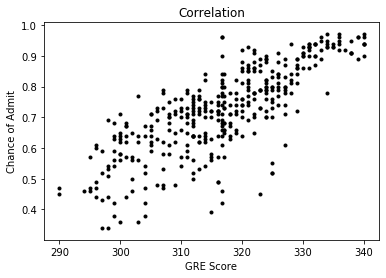

In [10]:
plt.scatter(data['GRE Score'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>With the increase of 'GRE Score', the value of 'Chance of Admit' also increases.</p><br>

In [11]:
plt.scatter(data['TOEFL Score'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>It seems that 'Chance of Admit' increases with the growth of 'TOEFL Score'.</p><br>

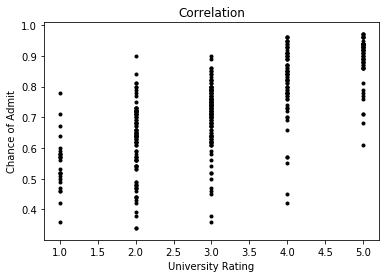

In [12]:
plt.scatter(data['University Rating'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>'Chance of Admit' is not fully related to 'University Rating'.</p><br>

In [13]:
plt.scatter(data['SOP'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>The value of 'Chance of Admit' varies in a wide range for a single value of 'SOP'.</p><br>

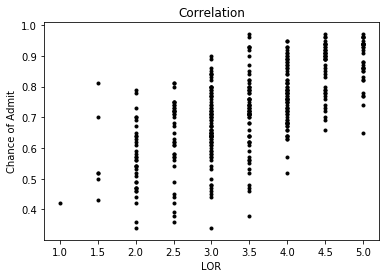

In [14]:
plt.scatter(data['LOR '], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('LOR')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>'Chance of Admit' is not fully dependent on 'LOR'.</p><br>

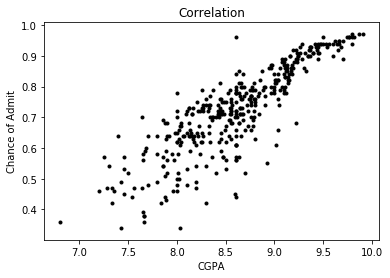

In [15]:
plt.scatter(data['CGPA'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>'Chance of Admit' has an approximate linear correlation with 'CGPA'.</p><br>

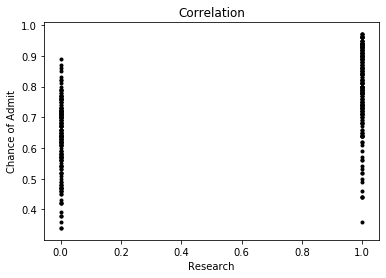

In [16]:
plt.scatter(data['Research'], data['Chance of Admit'], marker = '.', color = 'black')
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>'Chance of Admit' doesn't have a linear relation with 'Research'.</p>

<p> I believe 'CGPA' property has the most correlation with 'Chance of Admit'. As we can see in the plots, 'Chance of Admit' grows in a linear behaviour with growth of 'CGPA'. Increase of 'TOEFL Score' and 'GRE Score' also increase the 'Chance of Admit' property, but the plot based on 'CGPA' is more concentrated.</p><br>

In [17]:
forSpecialUni = data[(data['CGPA'] >= 9) & (data['TOEFL Score'] >= 110)]
forSpecialUni

Serial No.   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1  337.000000        118.0                  4  4.5   4.5  9.65   
5             6  330.000000        115.0                  5  4.5   3.0  9.34   
11           12  316.759259        111.0                  4  4.0   4.5  9.00   
12           13  328.000000        112.0                  4  4.0   4.5  9.10   
22           23  328.000000        116.0                  5  5.0   5.0  9.50   
..          ...         ...          ...                ...  ...   ...   ...   
385         386  316.759259        117.0                  5  5.0   5.0  9.82   
394         395  329.000000        111.0                  4  4.5   4.0  9.23   
395         396  324.000000        110.0                  3  3.5   3.5  9.04   
397         398  330.000000        116.0                  4  5.0   4.5  9.45   
399         400  333.000000        117.0                  4  5.0   4.0  9.66   

     Research  Chance of Admit  
0           1             0.92  
5           1             0.90  
11          1             0.84  
12          1             0.78  
22          1             0.94  
..        ...              ...  
385         1             0.96  
394         1             0.89  
395         1             0.82  
397         1             0.91  
399         1             0.95  

[97 rows x 9 columns]

In [18]:
forSpecialUni.shape[0]

97

<p>In this section, we want to filter the students with at least 9 for 'CGPA' value and 110 for 'TOEFL Score'. We select the valid students and create a new dataframe with their information.</p><br>

In [19]:
uniBasedData = data.groupby('University Rating')
uniBasedData.get_group(1)['GRE Score'].mean()

303.15384615384613

In [20]:
uniBasedData.get_group(2)['GRE Score'].mean()

309.7528556593977

In [21]:
uniBasedData.get_group(3)['GRE Score'].mean()

315.9346978557505

In [22]:
uniBasedData.get_group(4)['GRE Score'].mean()

324.07507507507506

In [23]:
uniBasedData.get_group(5)['GRE Score'].mean()

327.9546296296296

<p>The groupby function is used to group the data based on the given criterion. We group data based on 'University Rating' and then get each group using get_group function. Finally we calculate the 'GRE Score' mean value for each group.</p><br>

In [24]:
CGPAdata = data.loc[:, ['CGPA', 'Chance of Admit']]
CGPAdata

CGPA  Chance of Admit
0    9.65             0.92
1    8.87              NaN
2    8.00             0.72
3    8.67             0.80
4    8.21             0.65
..    ...              ...
395  9.04             0.82
396  9.11              NaN
397  9.45             0.91
398  8.78             0.67
399  9.66             0.95

[400 rows x 2 columns]

In [25]:
t0 = 0.1
t1 = 1
alpha = 0.001
def hypothesisFunc(x, t0, t1):
    return t0 + t1 * x
def costFunc(t0, t1, inputData, actualRes):
    hChance = inputData.apply(hypothesisFunc, args= (t0, t1))
    sub = hChance.subtract(actualRes)
    square = (sub ** 2)
    mse = square.sum() / (2 * square.count())
    return mse
def dCostDt0(t0, t1, inputData, actualRes):
    hChance = inputData.apply(hypothesisFunc, args= (t0, t1))
    sub = hChance.subtract(actualRes)
    return sub.sum() / sub.count()
def dCostDt1(t0, t1, inputData, actualRes):
    hChance = inputData.apply(hypothesisFunc, args= (t0, t1))
    sub = hChance.subtract(actualRes)
    mult = sub.mul(inputData)
    return mult.sum() / mult.count()

while costFunc(t0, t1, data['CGPA'], CGPAdata['Chance of Admit']) > 0.004:
    t0p = t0 - alpha * sign(dCostDt0(t0, t1, data['CGPA'], CGPAdata['Chance of Admit']))
    t1 = t1 - alpha * sign(dCostDt1(t0, t1, data['CGPA'], CGPAdata['Chance of Admit']))
    t0 = t0p
    
costFunc(t0, t1, data['CGPA'], CGPAdata['Chance of Admit'])

0.0036604500547561393

<p>Our goal is to minimize the cost function. For achieving this goal, we should find better values for t0 and t1 in every step and finally a more accurate hypothesis function. We want to know how the cost function changes when we change t0 and t1, so we need the partial derivatives. If partial derivative of the cost function to t0 is positive, it means that we should decrease t0 to reach the minimum cost function. On the other hand, if the earlier mentioned derivative is negative, it means that t0 should be increased. The same rule applies for the partial derivative of the cost function to t1. Alpha is the learning parameter which t0 and t1 change with at each step. If alpha is too small, it takes a long time to accomplish our goal. In contrast, if alpha is too large, the result is not accurate and may overshoot. So it's important to find a reasonable learning parameter.<br>
For more information about the math, you can visit: https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2 </p><br>

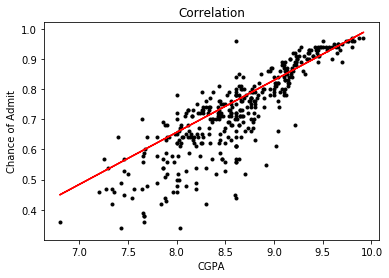

In [26]:
plt.scatter(CGPAdata['CGPA'], CGPAdata['Chance of Admit'], marker = '.', color = 'black')
hChance = CGPAdata['CGPA'].apply(hypothesisFunc, args= (t0, t1))
plt.plot(CGPAdata['CGPA'], hChance, color= 'red')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Correlation')
plt.show()

<p>As we can see in the figure, the estimated values for 'Chance of Admit' using hypothesis function are so close to the actual values.</p><br>

In [27]:
nullChances = CGPAdata[CGPAdata['Chance of Admit'].isnull()]
nullChances = nullChances['Chance of Admit'].fillna(nullChances['CGPA'].apply(hypothesisFunc, args= (t0, t1)))
nullChances

1      0.80751
57     0.58780
135    0.79021
143    0.98916
171    0.84211
218    0.82481
232    0.70371
251    0.83000
272    0.59472
294    0.71236
315    0.66911
338    0.78502
357    0.63797
381    0.77291
390    0.69852
396    0.84903
Name: Chance of Admit, dtype: float64

<p>In this part we replaced the missing values of 'Chance of Admit' with the values that we estimated and It's expected that these values are close to the real ones.</p><br>